<a href="https://colab.research.google.com/github/Harshrana9989/Harshrana9989/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
 air_quality_data =pd.read_csv('/content/AirQualityUCI.csv')


In [ ]:
print(air_quality_data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/3/2004  18.00.00     2.6         1360     150.0      11.9   
1  10/3/2004  19.00.00     2.0         1292     112.0       9.4   
2  10/3/2004  20.00.00     2.2         1402      88.0       9.0   
3  10/3/2004  21.00.00     2.2         1376      80.0       9.2   
4  10/3/2004  22.00.00     1.6         1272      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692       1268.0   
1            955      103          1174       92          1559        972.0   
2            939      131          1140      114          1555       1074.0   
3            948      172          1092      122          1584       1203.0   
4            836      131          1205      116          1490       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [ ]:
air_quality_data =pd.read_csv('/content/AirQualityUCI.csv',sep=';',decimal=',')


In [ ]:
print(air_quality_data.head())

  Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0  10/3/2004,18.00.00,2.6,1360,150,11.9,1046,166,...                                                                        
1  10/3/2004,19.00.00,2,1292,112,9.4,955,103,1174...                                                                        
2  10/3/2004,20.00.00,2.2,1402,88,9,939,131,1140,...                                                                        
3  10/3/2004,21.00.00,2.2,1376,80,9.2,948,172,109...                                                                        
4  10/3/2004,22.00.00,1.6,1272,51,6.5,836,131,120...                                                                        


In [ ]:
air_quality_data=air_quality_data.iloc[:,:-2]

In [ ]:
print(air_quality_data.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
print(air_quality_data.tail())

Empty DataFrame
Columns: []
Index: [9352, 9353, 9354, 9355, 9356]


In [ ]:
air_quality_data.shape


(9357, 0)

In [ ]:
air_quality_data.loc[[9356]]


""
9356


In [ ]:
air_quality_data=air_quality_data.head(9357)

In [ ]:
air_quality_data.tail()

""
9352
9353
9354
9355
9356


In [ ]:
air_quality_data.shape

(9357, 0)

In [ ]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Empty DataFrame


In [ ]:
air_quality_data.isnull().sum()

,0


here is the thing that there is no null values but wgen we read dataset we get to know that actual null values are reprsented by -200

In [ ]:
 air_quality_data.isin([-200]).sum(axis=0)

,0


In [ ]:
air_quality_data = air_quality_data.replace(to_replace=-200, value=np.NaN)

In [ ]:
air_quality_data.isnull().sum()

,0


In [ ]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:


# Dictionary to store the count of outliers for each column
outliers_count = {}

# Loop over each numerical column in the DataFrame
for column in air_quality_data.select_dtypes(include=[np.number]):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = air_quality_data[column].quantile(0.25)
    Q3 = air_quality_data[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the interquartile range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = (air_quality_data[column] < lower_bound) | (air_quality_data[column] > upper_bound)

    # Store the count of outliers
    outliers_count[column] = outliers.sum()

    # Replace outliers with the mean of the column
    mean_value = air_quality_data[column].mean()
    air_quality_data.loc[outliers, column] = mean_value



In [ ]:
date_info= pd.to_datetime(air_quality_data['Date'])

KeyError: 'Date'

In [ ]:
time_info=air_quality_data['Time']

In [ ]:
print(time_info)

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9466    00.00.00
9467    00.00.00
9468    00.00.00
9469    00.00.00
9470    00.00.00
Name: Time, Length: 9471, dtype: object


In [ ]:
time_info=time_info.apply(lambda x:x.replace('.',':'))

In [ ]:
date_time=pd.concat([date_info,time_info],axis=1)

In [ ]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [ ]:
date_time['ds']=date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)


In [ ]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [ ]:
data=pd.DataFrame()

In [ ]:
data['ds']=pd.to_datetime(date_time['ds'])

In [ ]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [ ]:
data['y']=air_quality_data['RH']

In [ ]:
data.tail()

,ds,y
9466,2005-01-01,53.1
9467,2005-01-01,53.1
9468,2005-01-01,53.1
9469,2005-01-01,53.1
9470,2005-01-01,53.1


In [ ]:
data.head()

,ds,y
0,2004-03-10 18:00:00,113.0
1,2004-03-10 19:00:00,92.0
2,2004-03-10 20:00:00,114.0
3,2004-03-10 21:00:00,122.0
4,2004-03-10 22:00:00,116.0


In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)  # 80% training, 20% testing
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [ ]:

pip install prophet


In [ ]:
 from prophet import Prophet

In [ ]:
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptkr3m39m/4vde8erk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptkr3m39m/3ai6ek34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41979', 'data', 'file=/tmp/tmptkr3m39m/4vde8erk.json', 'init=/tmp/tmptkr3m39m/3ai6ek34.json', 'output', 'file=/tmp/tmptkr3m39m/prophet_modelkndoy8su/prophet_model-20241102051901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:19:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=len(test_data), freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [ ]:

forecast_test = forecast[['ds', 'yhat']].iloc[train_size:]

In [ ]:
# Calculate accuracy metrics
y_true = test_data['y'].values  # Actual values
y_pred = forecast_test['yhat'].values  # Predicted values


In [ ]:
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)



In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 12.922778856746016
Mean Squared Error (MSE): 241.29375118855614


In [ ]:
# Calculate R²
r_squared = r2_score(y_true, y_pred)
print(f"R-squared (R²): {r_squared:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
percentage_error = np.abs((y_true - y_pred) / y_true) * 100
mean_percentage_error = np.mean(percentage_error)
print(f"Mean Absolute Percentage Error (MAPE): {mean_percentage_error:.2f}%")

# Calculate accuracy based on MAE
mean_actual = np.mean(y_true)
accuracy = (1 - (mae / mean_actual)) * 100
print(f"Accuracy based on MAE: {accuracy:.2f}%")

R-squared (R²): 0.0211
Mean Absolute Percentage Error (MAPE): 33.86%
Accuracy based on MAE: 74.29%


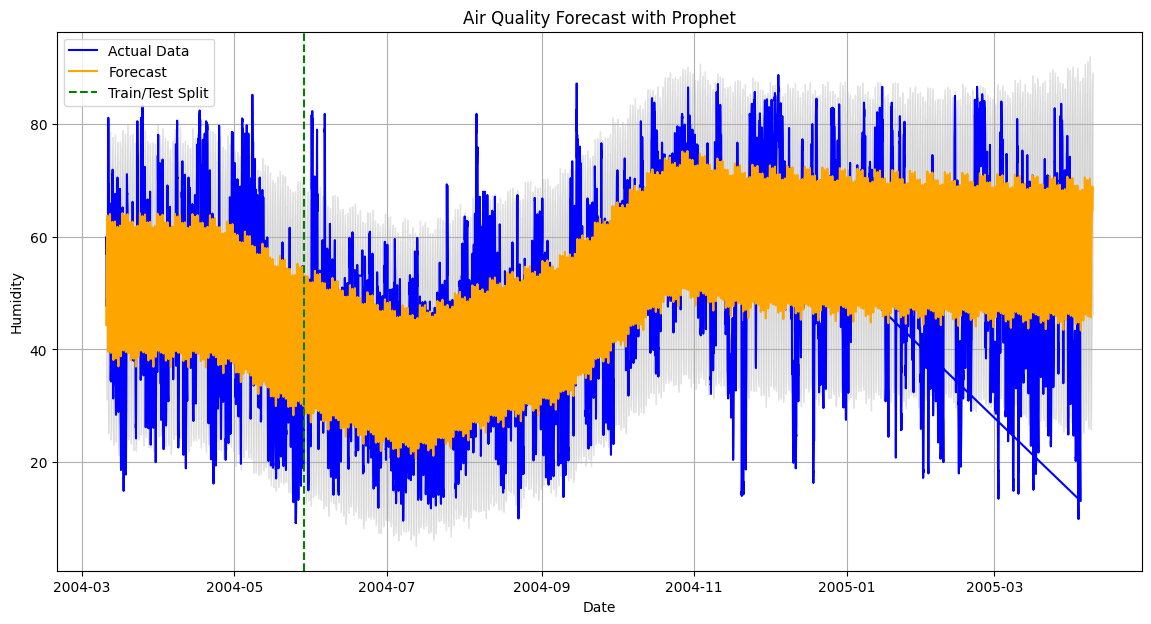

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original data
plt.figure(figsize=(14, 7))
plt.plot(data['ds'], data['y'], label='Actual Data', color='blue')

# Plotting the forecast
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')

# Highlighting the training data
plt.axvline(x=data['ds'].iloc[-train_size], color='green', linestyle='--', label='Train/Test Split')

# Add confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)

# Set title and labels
plt.title('Air Quality Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.grid()
plt.show()
